In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [128]:
df = pd.read_csv('Company_Data (1).csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## EDA

In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
df.shape

(400, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [40]:
df[df.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [41]:
df.duplicated().sum()

0

## Encoding

In [14]:
!pip install category_encoders

In [17]:
import category_encoders as ce

In [129]:
Ordinal = ce.OrdinalEncoder(cols = ['ShelveLoc','Urban','US'])
Ordinal

OrdinalEncoder(cols=['ShelveLoc', 'Urban', 'US'])

In [130]:
df1 = Ordinal.fit_transform(df)

In [131]:
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,1,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,3,59,12,1,1
3,7.40,117,100,4,466,97,3,55,14,1,1
4,4.15,141,64,3,340,128,1,38,13,1,2


In [132]:
Target_var_sale = []
for value in df1["Sales"]:
    if value<= 8:
        Target_var_sale.append("low")
    else:
        Target_var_sale.append("high")

df1["Target_var_sale"]= Target_var_sale

In [133]:
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Target_var_sale
0,9.50,138,73,11,276,120,1,42,17,1,1,high
1,11.22,111,48,16,260,83,2,65,10,1,1,high
2,10.06,113,35,10,269,80,3,59,12,1,1,high
3,7.40,117,100,4,466,97,3,55,14,1,1,low
4,4.15,141,64,3,340,128,1,38,13,1,2,low


In [134]:
df1 = df1.drop(columns= 'Sales')

In [135]:
df1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Target_var_sale
0,138,73,11,276,120,1,42,17,1,1,high
1,111,48,16,260,83,2,65,10,1,1,high
2,113,35,10,269,80,3,59,12,1,1,high
3,117,100,4,466,97,3,55,14,1,1,low
4,141,64,3,340,128,1,38,13,1,2,low


In [62]:
x = df1.iloc[:,:-1]
y = df1['Target_var_sale']

## Splitting the data

In [63]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

### Using C5(Entropy Criteria)

In [99]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth= 7)

In [100]:
dt.fit(xtrain,ytrain)

ypred = dt.predict(xtest)

from sklearn.metrics import classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        high       0.75      0.75      0.75        32
         low       0.83      0.83      0.83        48

    accuracy                           0.80        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.80      0.80      0.80        80



In [101]:
print('Training accuracy:', dt.score(xtrain,ytrain))
print('Testing Accuracy:', dt.score(xtest,ytest))

Training accuracy: 0.95
Testing Accuracy: 0.8


In [102]:
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth= 8)

In [103]:
dt1.fit(xtrain,ytrain)

ypred = dt1.predict(xtest)

from sklearn.metrics import classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        high       0.75      0.75      0.75        32
         low       0.83      0.83      0.83        48

    accuracy                           0.80        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.80      0.80      0.80        80



In [104]:
print('Training accuracy:', dt1.score(xtrain,ytrain))
print('Testing Accuracy:', dt1.score(xtest,ytest))

Training accuracy: 0.984375
Testing Accuracy: 0.8


In [105]:
dt2 = DecisionTreeClassifier(criterion='entropy')

In [106]:
dt2.fit(xtrain,ytrain)

ypred = dt2.predict(xtest)

from sklearn.metrics import classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        high       0.74      0.72      0.73        32
         low       0.82      0.83      0.82        48

    accuracy                           0.79        80
   macro avg       0.78      0.78      0.78        80
weighted avg       0.79      0.79      0.79        80



In [107]:
print('Training accuracy:', dt2.score(xtrain,ytrain))
print('Testing Accuracy:', dt2.score(xtest,ytest))

Training accuracy: 1.0
Testing Accuracy: 0.7875


## Visualization

In [108]:
plt.rcParams['figure.figsize']= (10,10)
plt.rcParams['figure.dpi']= 450

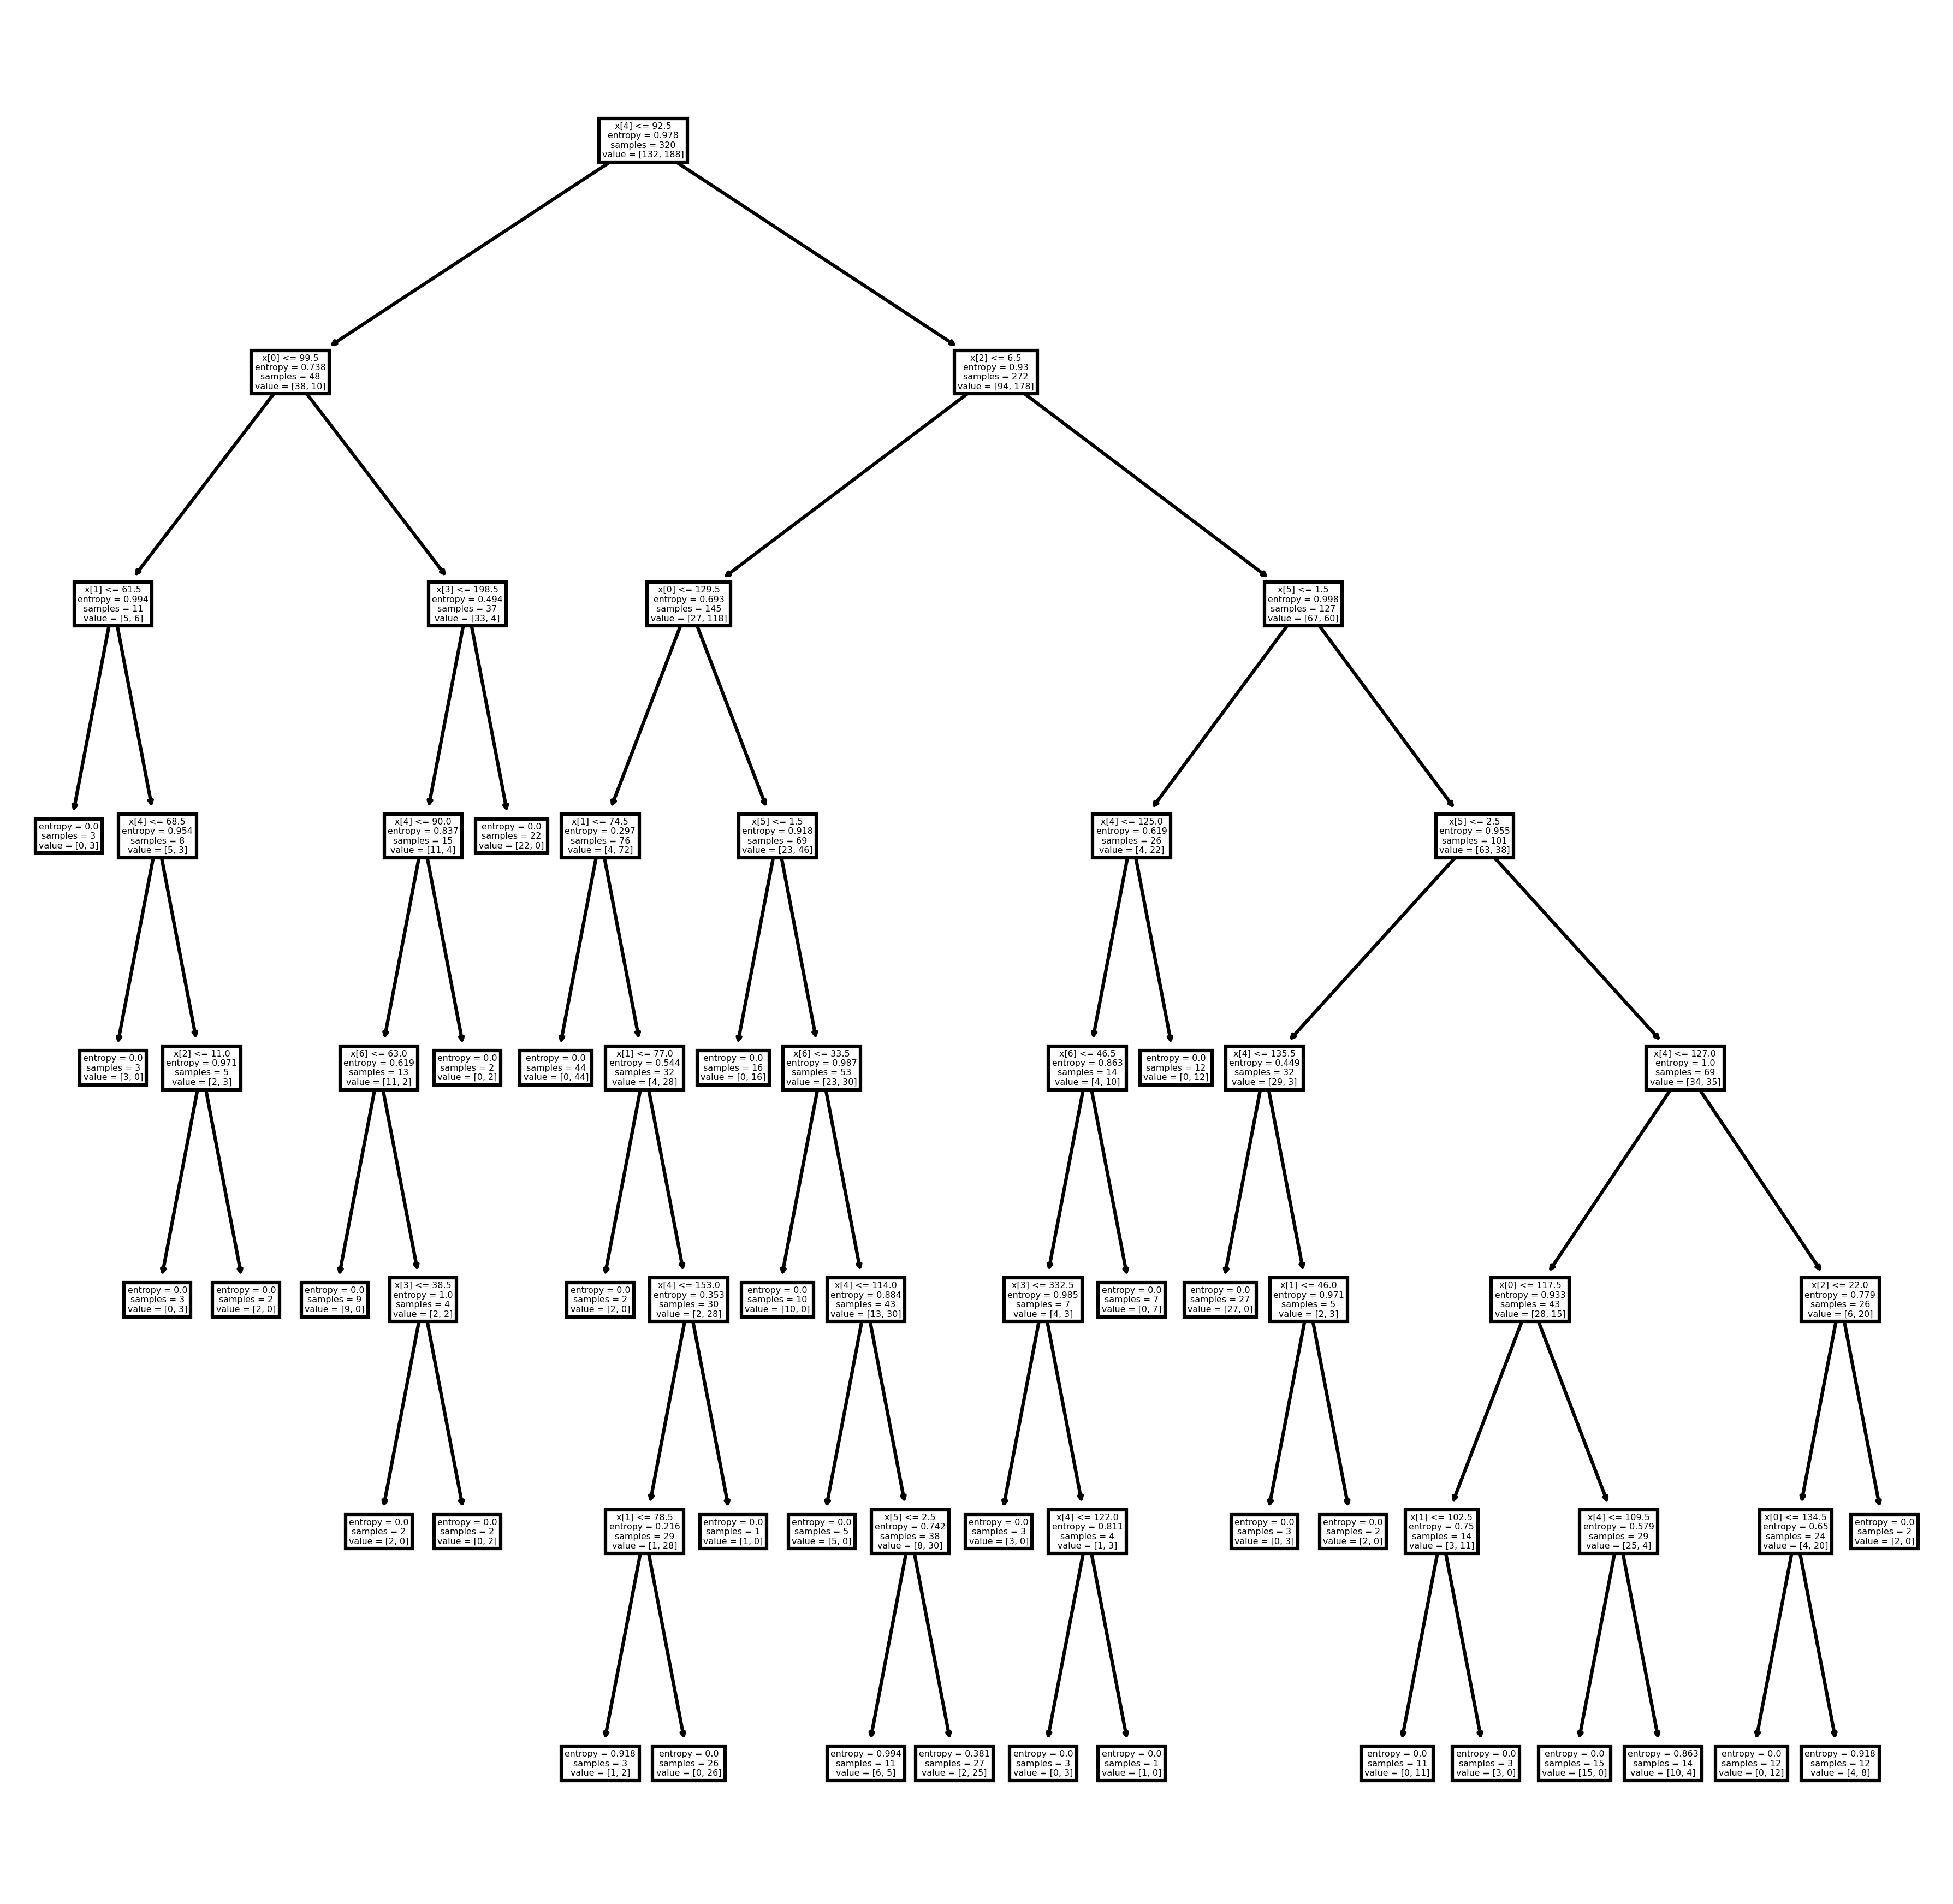

In [110]:
tree.plot_tree(dt)
plt.show()

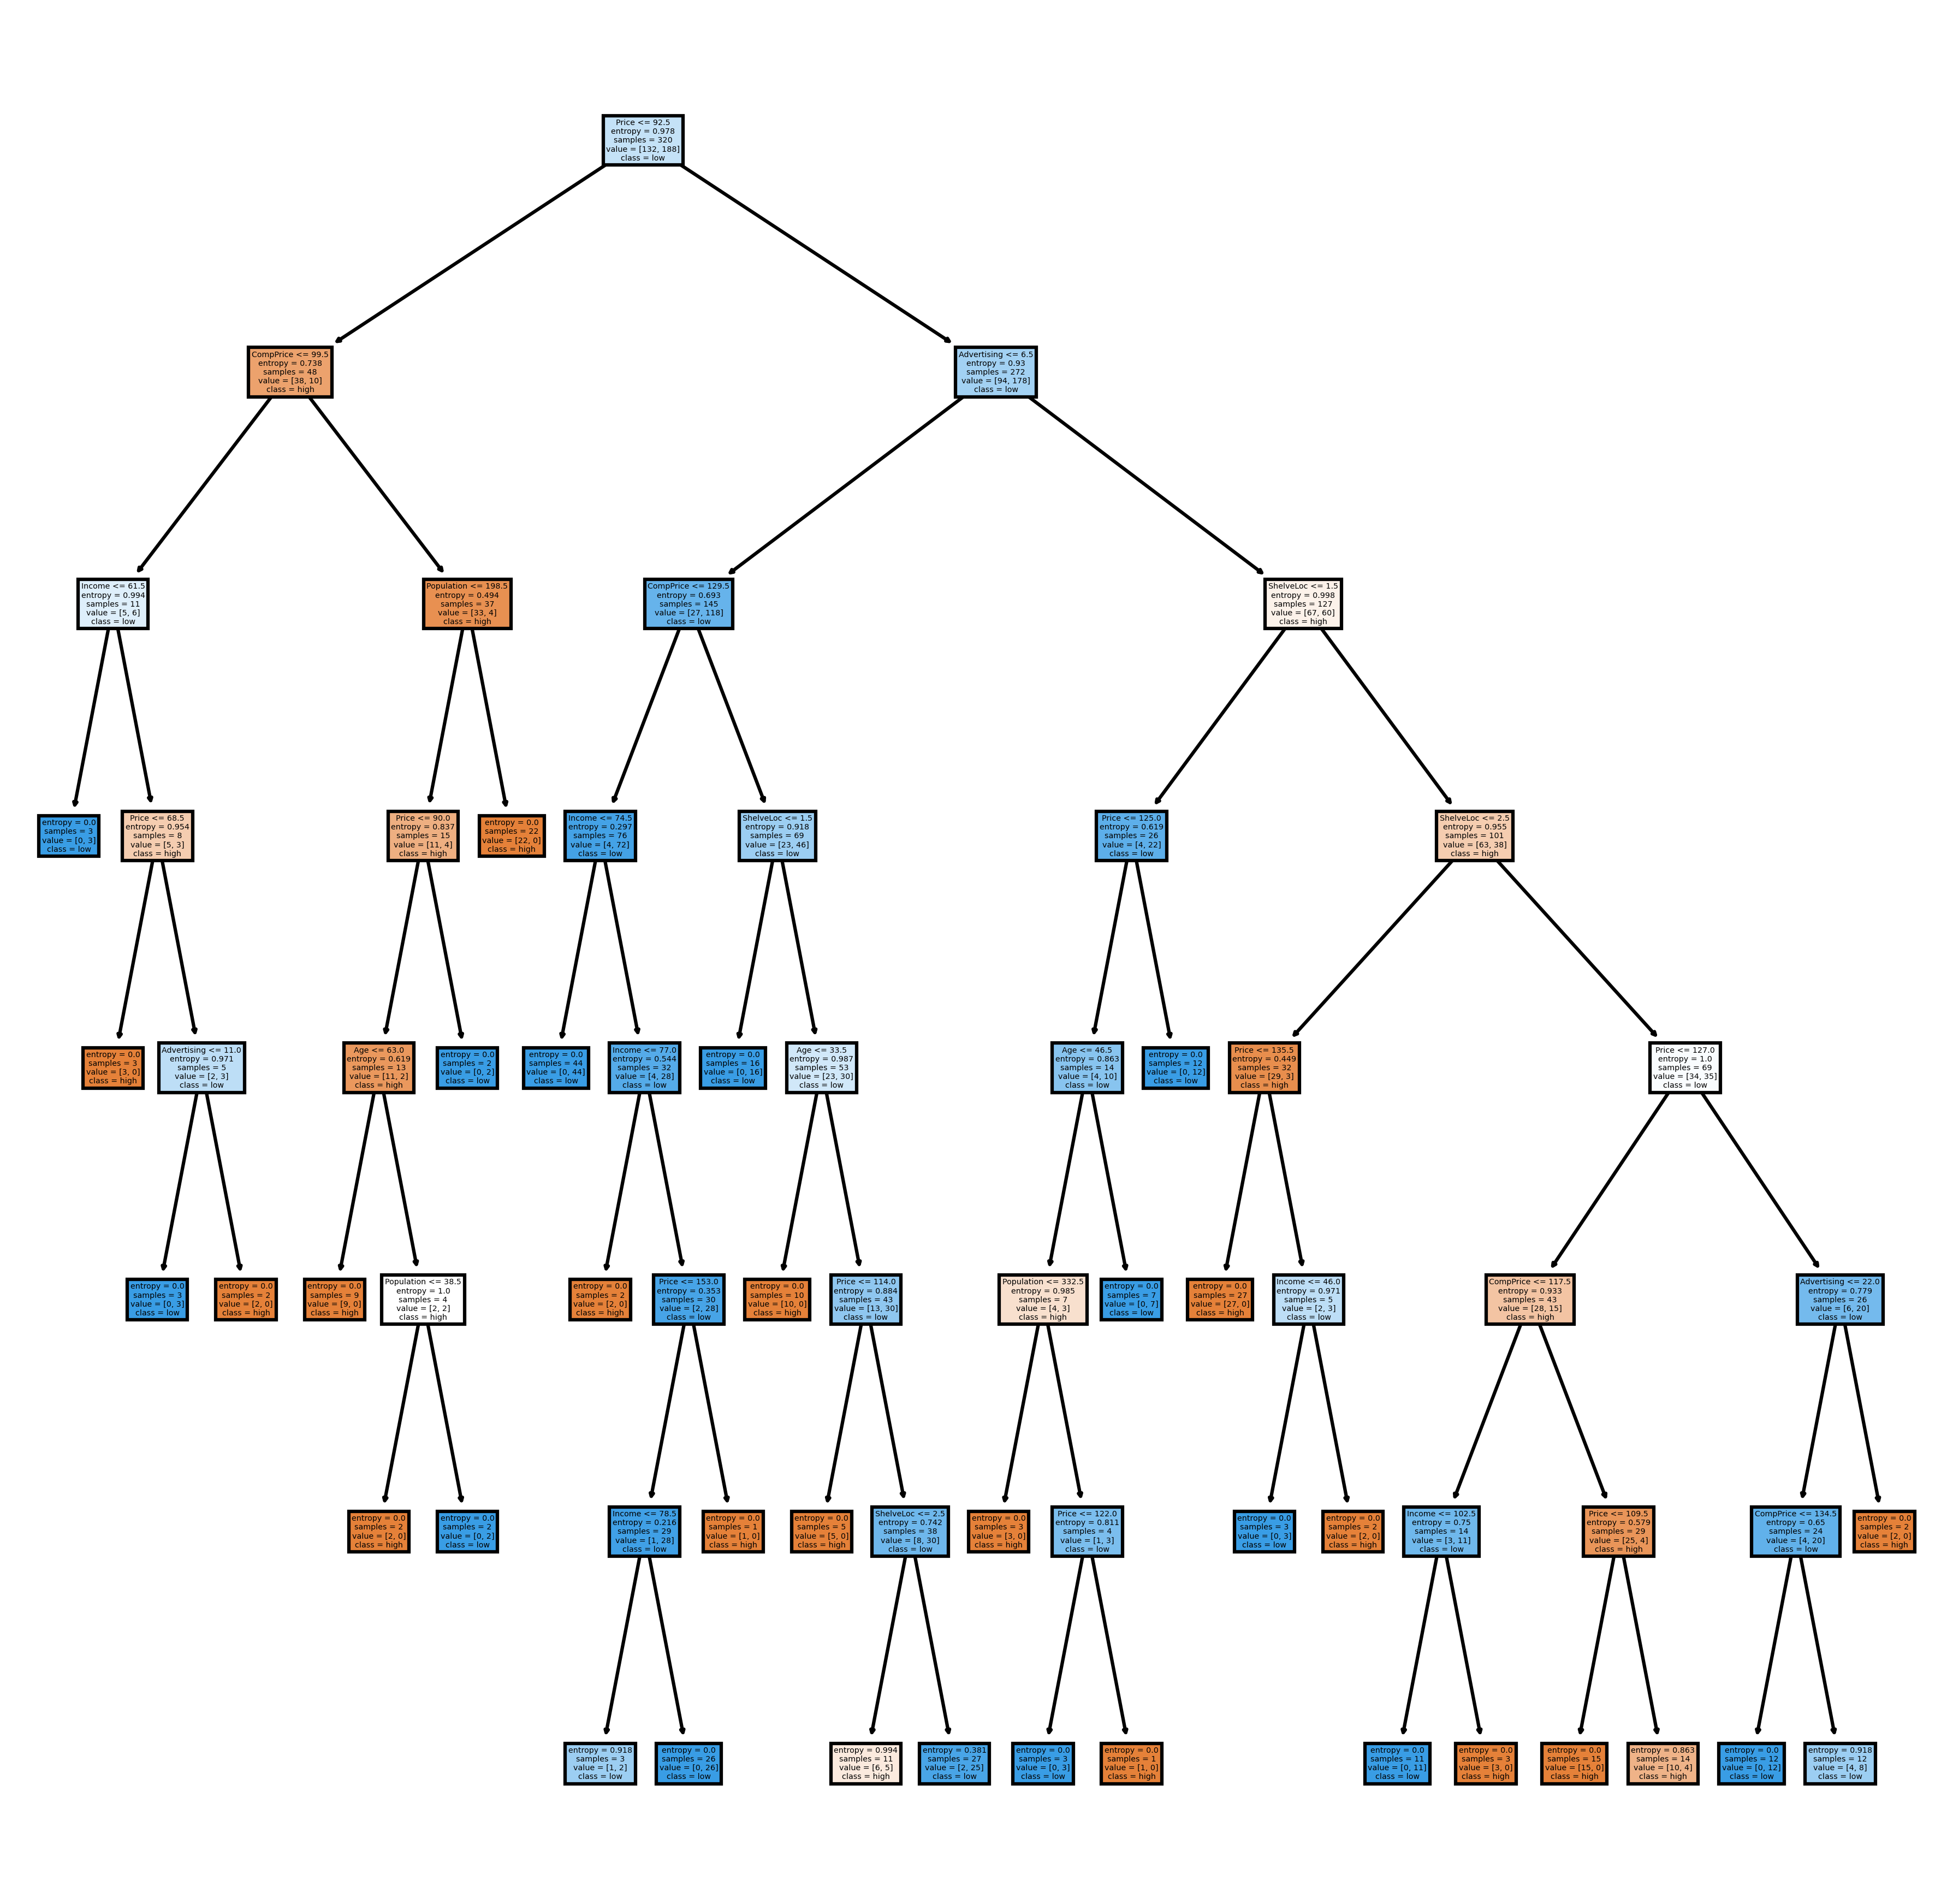

In [111]:
tree.plot_tree(dt,feature_names= x.columns,class_names=df1['Target_var_sale'].unique(),filled=True)

plt.show()

In [127]:
dt.feature_importances_

array([0.14379461, 0.12856882, 0.13250048, 0.05036051, 0.2857863 ,
       0.17038201, 0.08860726, 0.        , 0.        , 0.        ])

### Using CART(Gini Criteria)

In [136]:
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(xtrain,ytrain)

ypred = dt.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        high       0.65      0.75      0.70        32
         low       0.81      0.73      0.77        48

    accuracy                           0.74        80
   macro avg       0.73      0.74      0.73        80
weighted avg       0.75      0.74      0.74        80



In [137]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.7375


In [138]:
dt.feature_importances_

array([0.13484547, 0.07967617, 0.13566473, 0.04680132, 0.30219285,
       0.15931569, 0.09933436, 0.04216941, 0.        , 0.        ])